In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4'], dtype='object')

In [5]:
df_min=df[df['4']==1]

In [6]:
df_min.to_csv('iris0_minority_train.csv',index=False)
df_min=pd.read_csv('iris0_minority_train.csv')

In [7]:
df_majority=df[df['4']==0]
df_majority.to_csv('iris0_majority_train.csv',index=False)
df_majority=pd.read_csv('iris0_majority_train.csv')

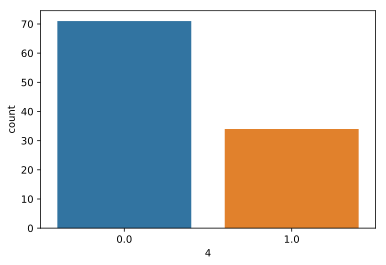

In [8]:
%matplotlib inline
sns.countplot(x='4',data=df)

In [9]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [10]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(28, 5, 5)
(28, 5)


In [11]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [15]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(5))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 20)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
Total params: 2,185
Trainable params: 2,185
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
model.compile(loss='mse',optimizer='adam')

In [17]:
history=model.fit(Xtrain,Ytrain,epochs=500,verbose=1)

Epoch 1/500
16/16 [==============================] - 17s 1s/step - loss: 0.2987
Epoch 2/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2931
Epoch 3/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2868
Epoch 4/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2804
Epoch 5/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2740
Epoch 6/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2677
Epoch 7/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2615
Epoch 8/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2555
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2496
Epoch 10/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2439
Epoch 11/500
16/16 [==============================] - 0s 1ms/step - loss: 0.2384
Epoch 12/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2331
Epoch 13/500
16/16 [=================

Epoch 103/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0360
Epoch 104/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0359
Epoch 105/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0359
Epoch 106/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0358
Epoch 107/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0357
Epoch 108/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 109/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 110/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0356
Epoch 111/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 112/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 113/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 114/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0354
Epoch 115/500
16

Epoch 203/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 204/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 205/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0315
Epoch 206/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 207/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0314
Epoch 208/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0313
Epoch 209/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0313
Epoch 210/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 211/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 212/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 213/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 214/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0311
Epoch 215/500
16

Epoch 303/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0266
Epoch 304/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 305/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0265
Epoch 306/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 307/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 308/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 309/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 310/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0262
Epoch 311/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0261
Epoch 312/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0260
Epoch 313/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0260
Epoch 314/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0259
Epoch 315/500
16

Epoch 403/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0207
Epoch 404/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0206
Epoch 405/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 406/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 407/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0204
Epoch 408/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 409/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 410/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0203
Epoch 411/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 412/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0202
Epoch 413/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 414/500
16/16 [==============================] - 0s 1ms/step - loss: 0.0201
Epoch 415/500
16

In [18]:
model.save('7-24-2019-iris0-v1.h5')

In [19]:
Xtrain.shape

(16, 5, 5)

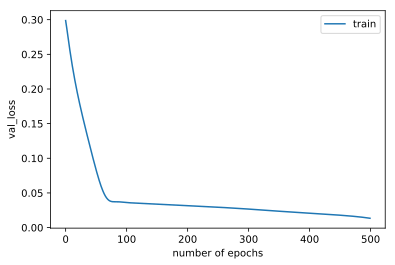

In [20]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [21]:
prediction=model.predict(xtest)

In [22]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

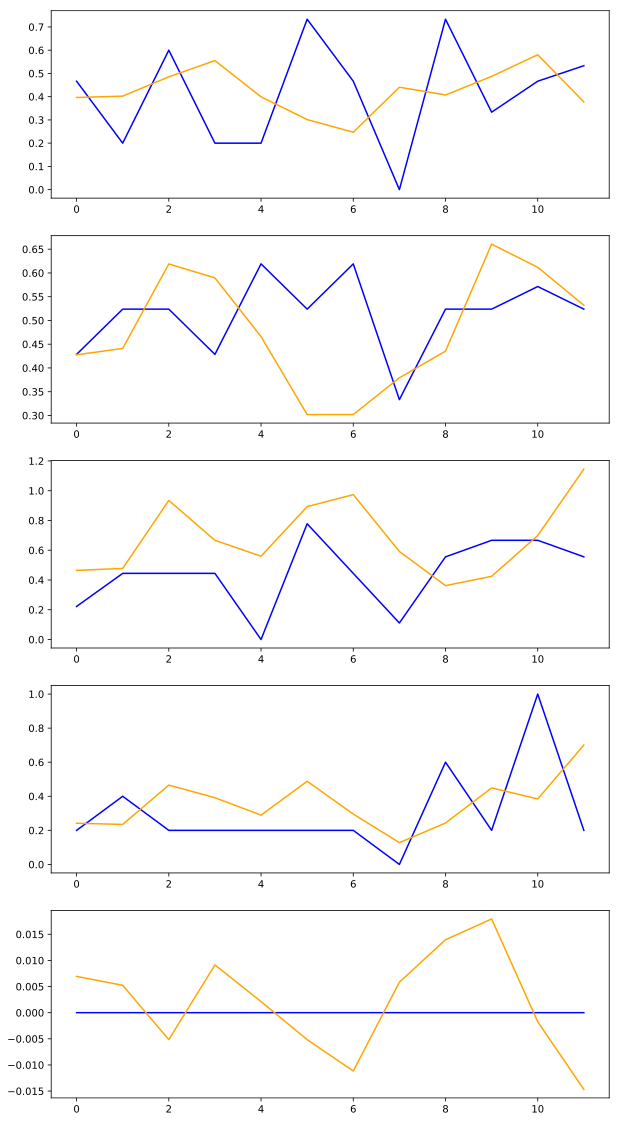

In [23]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [24]:
prediction

array([[ 0.39641705,  0.42777342,  0.46461132,  0.24161145,  0.00694163],
       [ 0.40235245,  0.44101477,  0.47776154,  0.23497668,  0.00523334],
       [ 0.48548245,  0.6188927 ,  0.9345497 ,  0.46551344, -0.00516129],
       [ 0.55531055,  0.58955866,  0.66647124,  0.39145172,  0.00913645],
       [ 0.3992485 ,  0.4660303 ,  0.5599164 ,  0.28921136,  0.00211789],
       [ 0.30146757,  0.301896  ,  0.8930908 ,  0.48809284, -0.005159  ],
       [ 0.24690111,  0.3020086 ,  0.97368085,  0.29552957, -0.01115878],
       [ 0.44065374,  0.3793195 ,  0.59168106,  0.1279512 ,  0.00582424],
       [ 0.40732375,  0.4354455 ,  0.36221302,  0.24296618,  0.01396105],
       [ 0.48738834,  0.6605951 ,  0.4246324 ,  0.4491088 ,  0.01793048],
       [ 0.58052754,  0.61185974,  0.6988472 ,  0.3841776 , -0.00174209],
       [ 0.3774383 ,  0.53194696,  1.1452371 ,  0.70080596, -0.01467783]],
      dtype=float32)

In [25]:
prediction2=scaler.inverse_transform(prediction)

In [26]:
ytest2=scaler.inverse_transform(ytest)

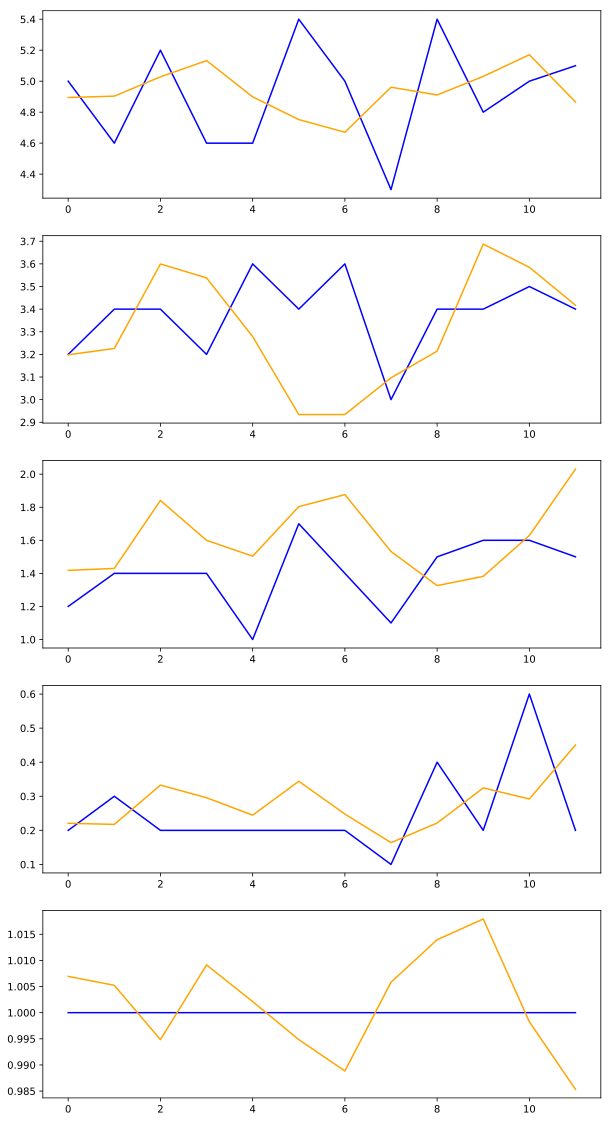

In [27]:
draw_prediction(ytest2,prediction2,clmns)

In [28]:
prediction

array([[ 0.39641705,  0.42777342,  0.46461132,  0.24161145,  0.00694163],
       [ 0.40235245,  0.44101477,  0.47776154,  0.23497668,  0.00523334],
       [ 0.48548245,  0.6188927 ,  0.9345497 ,  0.46551344, -0.00516129],
       [ 0.55531055,  0.58955866,  0.66647124,  0.39145172,  0.00913645],
       [ 0.3992485 ,  0.4660303 ,  0.5599164 ,  0.28921136,  0.00211789],
       [ 0.30146757,  0.301896  ,  0.8930908 ,  0.48809284, -0.005159  ],
       [ 0.24690111,  0.3020086 ,  0.97368085,  0.29552957, -0.01115878],
       [ 0.44065374,  0.3793195 ,  0.59168106,  0.1279512 ,  0.00582424],
       [ 0.40732375,  0.4354455 ,  0.36221302,  0.24296618,  0.01396105],
       [ 0.48738834,  0.6605951 ,  0.4246324 ,  0.4491088 ,  0.01793048],
       [ 0.58052754,  0.61185974,  0.6988472 ,  0.3841776 , -0.00174209],
       [ 0.3774383 ,  0.53194696,  1.1452371 ,  0.70080596, -0.01467783]],
      dtype=float32)

In [29]:
new_data=pd.DataFrame(prediction2)

In [30]:
new_data.to_csv('new_corrected_data-v1-7-24-2019.csv',index=False)